In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
bank = pd.read_csv('../Datasets/data_banknote_authentication.csv')

In [4]:
bank.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Variance_Wavelet  1372 non-null   float64
 1   Skewness_Wavelet  1372 non-null   float64
 2   Curtosis_Wavelet  1372 non-null   float64
 3   Image_Entropy     1372 non-null   float64
 4   Class             1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [9]:
#check's for dataset is balanced or not
bank.Class.value_counts()

0    762
1    610
Name: Class, dtype: int64

In [10]:
bank.columns

Index(['Variance_Wavelet', 'Skewness_Wavelet', 'Curtosis_Wavelet',
       'Image_Entropy', 'Class'],
      dtype='object')

# #Data Visualization

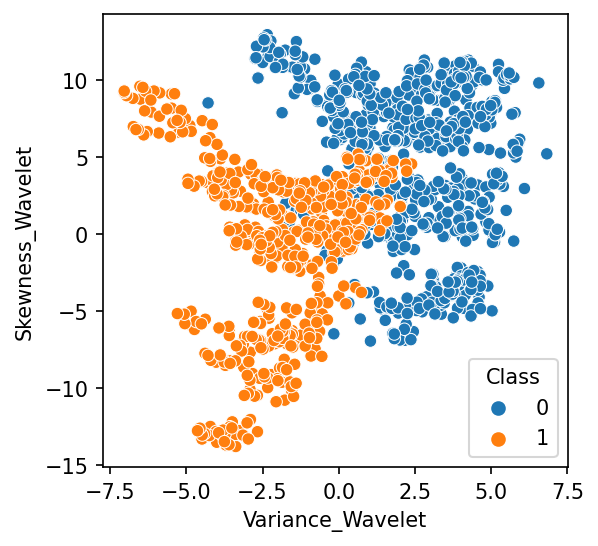

In [12]:
plt.figure(figsize=(4,4),dpi=150)
sns.scatterplot(data=bank,x='Variance_Wavelet',y='Skewness_Wavelet',hue='Class')
plt.show()

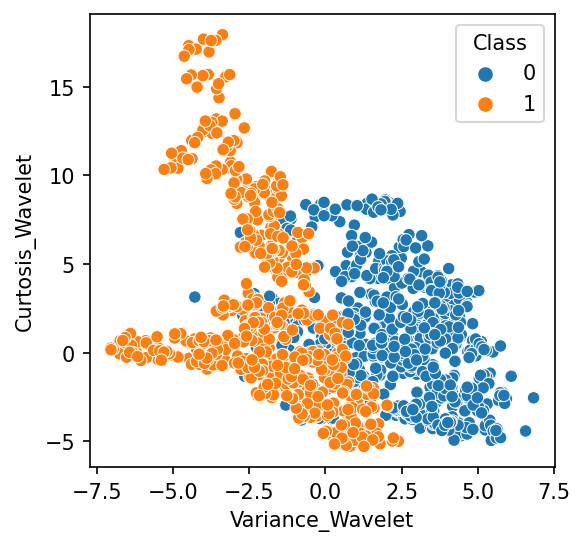

In [13]:
plt.figure(figsize=(4,4),dpi=150)
sns.scatterplot(data=bank,x='Variance_Wavelet',y='Curtosis_Wavelet',hue='Class')
plt.show()

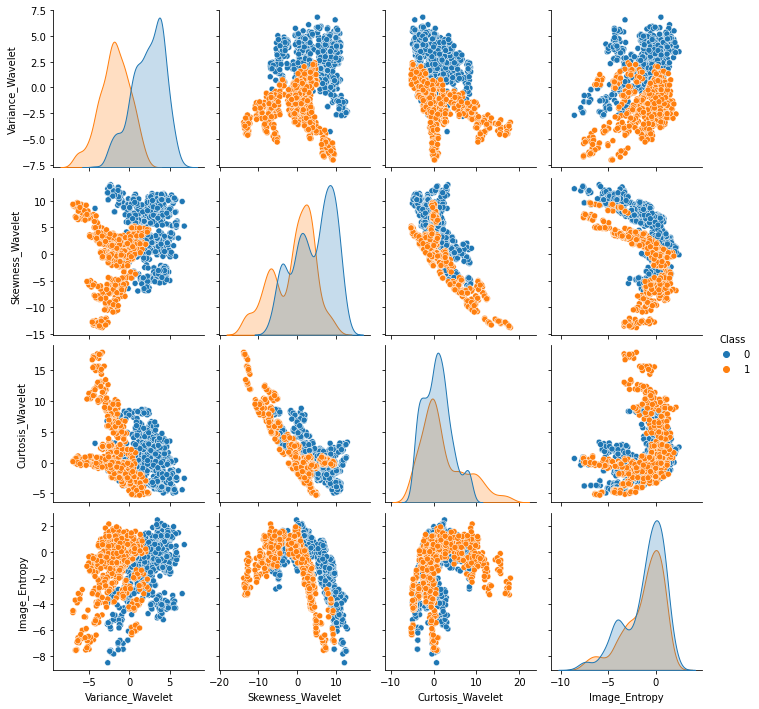

In [15]:
##pairplot
sns.pairplot(bank,hue='Class')

## #train-test-split

In [18]:
X = bank.drop(columns='Class',axis=1)
y = bank['Class']

In [16]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=101,test_size=.3)

## #Random Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
model = RandomForestClassifier(n_estimators=40,max_features='auto')

In [22]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=40)

In [23]:
y_pred = model.predict(X_test)

## #Model performance testing

In [24]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score

In [25]:
confusion_matrix(y_test,y_pred)

array([[235,   3],
       [  0, 174]], dtype=int64)

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       238
           1       0.98      1.00      0.99       174

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


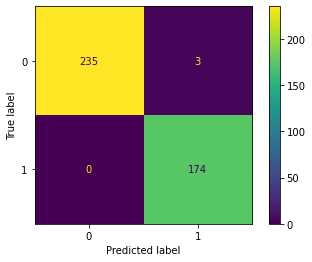

In [27]:
plot_confusion_matrix(model,X_test,y_test)

# #GridSearch method for best parameters

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
rand_model = RandomForestClassifier()

In [30]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------


In [37]:
n_estimators = [40,60,80,100,120,200]
criterion = ['gini','entropy']
max_features = ['auto','sqrt']
bootstrap  = ['True','False']
oob_score = ['True','False']

In [38]:
param_grid = { 'n_estimators':n_estimators,
               'criterion':criterion,
              'max_features':max_features,
              'bootstrap':bootstrap,
              'oob_score':oob_score
             }

In [40]:
grid_model = GridSearchCV(rand_model,param_grid=param_grid)

In [41]:
grid_model.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': ['True', 'False'],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [40, 60, 80, 100, 120, 200],
                         'oob_score': ['True', 'False']})

In [42]:
grid_pred = grid_model.predict(X_test)

In [43]:
grid_model.best_params_

{'bootstrap': 'False',
 'criterion': 'entropy',
 'max_features': 'sqrt',
 'n_estimators': 100,
 'oob_score': 'True'}

In [44]:
confusion_matrix(y_test,grid_pred)

array([[233,   5],
       [  0, 174]], dtype=int64)

In [46]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       238
           1       0.97      1.00      0.99       174

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



In [57]:
grid_model.best_estimator_.feature_importances_

array([0.53897911, 0.21631492, 0.18169392, 0.06301205])

In [58]:
grid_model.best_score_

0.996875

In [60]:
grid_model.best_estimator_.oob_score_

0.9958333333333333

## #accuracy error and Miss-classification

In [49]:
error = []
miss_classification = []
for n in range(1,100):
    mdl = RandomForestClassifier(n_estimators=n,max_features=2,bootstrap=True)
    mdl.fit(X_train,y_train)
    prediction = mdl.predict(X_test)
    err = 1-accuracy_score(y_test,prediction)
    miss = np.sum(prediction != y_test)
    error.append(err)
    miss_classification.append(miss)
    

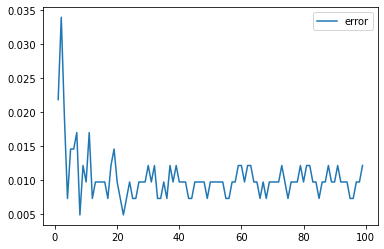

In [53]:
#error-plot
plt.plot(range(1,100),error,label='error')
plt.legend()

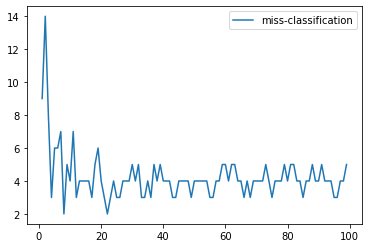

In [56]:
#miss_classification
plt.plot(range(1,100),miss_classification,label='miss-classification')
plt.legend()